## K-Means Clustering From Scratch (Using Numpy)

- K-Means is an unsupervised learning algorithm used to group unlabeled data into K clusters based on similarity (usually measured by distance).

Step-by-step:

- Step 0: Choose K (the number of clusters)
  
You decide in advance how many clusters (K) you want the algorithm to find.

- Step 1: Initialize centroids
  
Randomly pick K data points from the dataset as the initial centroids (starting points for clusters).

- Step 2: Assign points to the nearest centroid
  
For each data point:

**Calculate the distance (usually Euclidean) from each centroid.**

Assign the data point to the closest centroid’s cluster.

- Step 3: Update centroids
  
For each cluster:

Recalculate the centroid as the mean position of all the data points assigned to that cluster.

======================================================================

**Youtube video followed:**

K-Means Clustering From Scratch in Python (Mathematical) By NeuralNine

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class KMeansClustering:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distant(data_point, centroids):
        return np.sqrt(np.sum((centroids-data_point)**2, axis=1))

    def fit(self, X, max_iterations = 200):
        self.centroids = np.random.uniform(np.amin(X, axis = 0), np.amax(X,axis=0),
                                          size = (self.k, X.shape[1])) # to keep centroid between minimum and maximum of that dataset
        for _ in range(max_iterations):
            y = []
            for data_point in X:
                distances = KMeansClustering.euclidean_distant(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            np.array(y)
            cluster_indices = []
            for j in range(self.k):
                cluster_indices.append(np.argwhere(y==j))
            cluster_centers = []
            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis = 0)[0])

            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)

        return y

In [14]:
random_points = np.random.randint(0,100,(100,2))

In [15]:
kmeans = KMeansClustering(k=3)

In [16]:
labels = kmeans.fit(random_points)

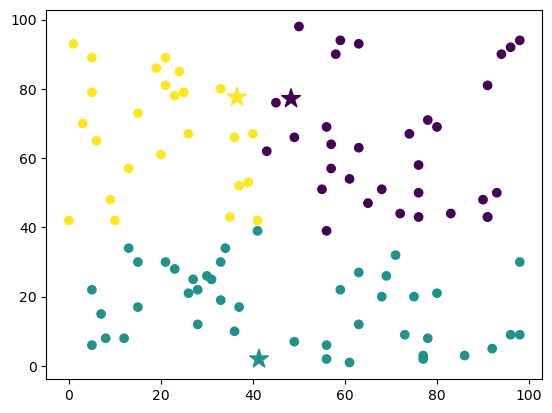

In [17]:
plt.scatter(random_points[:,0], random_points[:, 1], c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)), marker='*', s=200)